<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/ALANOCA_PARIZACA_ANDRES_ABEL_eva_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO PRACTICO: PREVISION DE VENTAS DE CAFE CON TENSOR FLOW  KERAS Y FLASH

1.- ANALISIS Y PREDIPARACION DE DATOS

In [2]:
import pandas as pd
import os

# Definir la ruta correcta
ruta_archivos = '/content/'

# Verificar si los archivos existen en la ruta especificada
if os.path.exists(ruta_archivos + 'index_1.csv') and os.path.exists(ruta_archivos + 'index_2.csv'):
    try:
        print("Archivos encontrados. Procediendo a cargarlos...")

        # Cargar los archivos
        index_1 = pd.read_csv(ruta_archivos + 'index_1.csv', delimiter=',')  # Usar coma como delimitador
        index_2 = pd.read_csv(ruta_archivos + 'index_2.csv', delimiter=',')  # Usar coma como delimitador

        # Mostrar las primeras filas para verificar que los datos se cargaron correctamente
        print("Primeras filas de index_1:")
        print(index_1.head())
        print("\nPrimeras filas de index_2:")
        print(index_2.head())

        # Unir los datasets
        combined_data = pd.concat([index_1, index_2], ignore_index=True)

        # Mostrar las primeras filas del dataset combinado
        print("\nDatos combinados correctamente.")
        print(combined_data.head())
    except Exception as e:
        print(f"Hubo un error al cargar los archivos: {e}")
else:
    print("No se encontraron los archivos 'index_1.csv' o 'index_2.csv' en el directorio especificado.")

Archivos encontrados. Procediendo a cargarlos...
Primeras filas de index_1:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Primeras filas de index_2:
         date             datetime cash_type  money            coffee_name
0  2025-02-08  2025-02-08 14:26:04      cash   15.0                    Tea
1  2025-02-08  2025-02-08 14:28:26      cash   15.0                    Tea
2  2025-02-08  2025-02-08 14:33:04      card   20.0               Espresso
3

In [3]:
import os

# Verificar el contenido del directorio /content/
print("Archivos en el directorio actual:")
print(os.listdir('/content/'))

Archivos en el directorio actual:
['.config', 'index_1.csv', 'index_2.csv', 'sample_data']


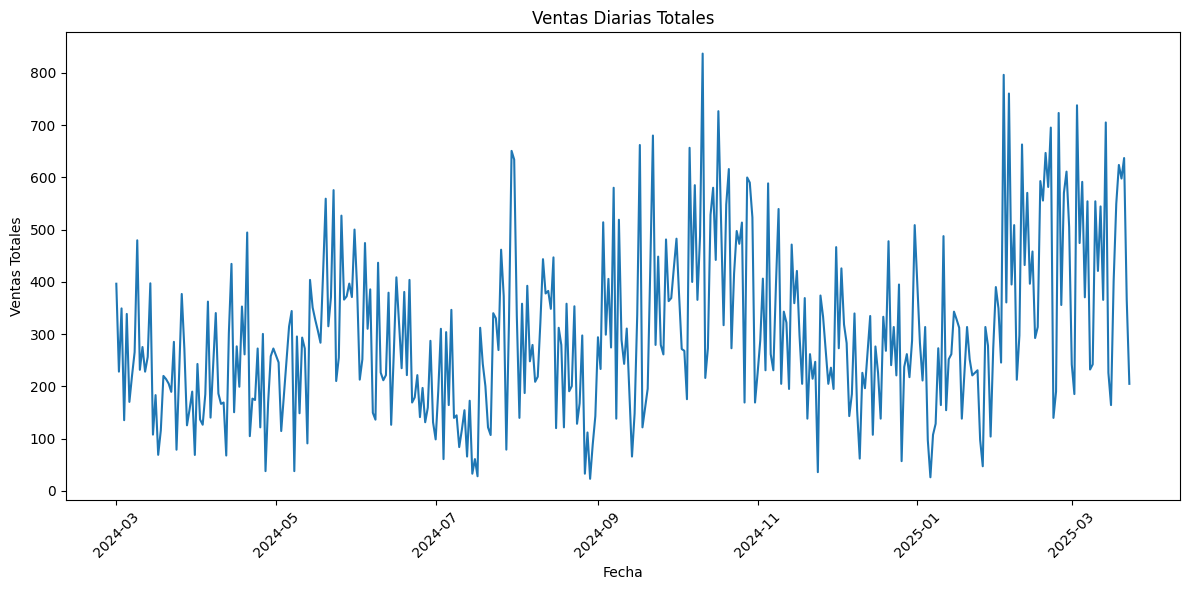

In [5]:
#### Análisis Exploratorio de Datos (EDA)

import matplotlib.pyplot as plt
import pandas as pd

# Si ya tienes combined_data, conviértelo en df
df = combined_data.copy()

# Convertir la columna 'datetime' a tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Eliminar registros con fechas no válidas
df = df.dropna(subset=['datetime', 'money'])

# Crear nueva columna 'date' solo con la fecha
df['date'] = df['datetime'].dt.date

# Agrupar y graficar las ventas diarias
daily_sales = df.groupby('date')['money'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot(title='Ventas Diarias Totales')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
### Ingeniería de Características
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarnos de que 'datetime' sea tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
# Extraer mes, día de la semana y hora
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek  # Lunes=0, Domingo=6
df['hour'] = df['datetime'].dt.hour
# Crear la columna 'cantidad_total_vendida_no_dia'
df['date'] = df['datetime'].dt.date  # Extraemos solo la fecha
daily_sales = df.groupby('date')['money'].sum().reset_index()  # Sumar ventas por día
df = df.merge(daily_sales[['date', 'money']], on='date', suffixes=('', '_total_dia'))  # Unir los datos
# Codificar la variable categórica 'coffee_name' usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['coffee_name'], drop_first=True)
# Verificamos las primeras filas del DataFrame con las nuevas características
print(df_encoded.head())

         date                datetime cash_type                 card  money  \
0  2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

   month  day_of_week  hour  money_total_dia  coffee_name_Americano with Milk  \
0      3            4    10            396.3                            False   
1      3            4    12            396.3                            False   
2      3            4    12            396.3                            False   
3      3            4    13            396.3                            False   
4      3            4    13            396.3                            False   

   coffee_name_Cappuccino  coffee_name

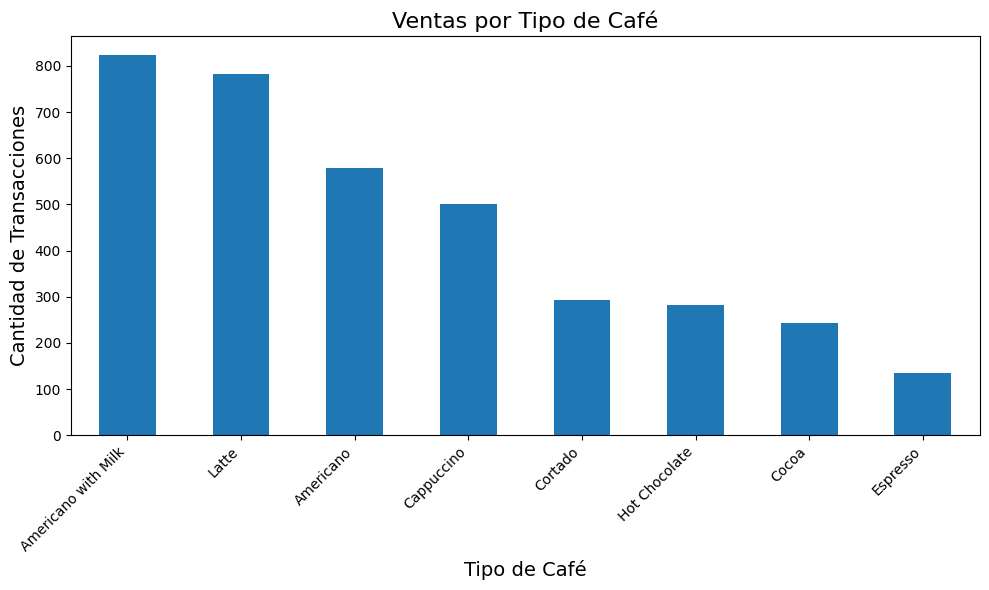

In [7]:
# **Gráfico de Ventas por Tipo de Café**
plt.figure(figsize=(10, 6))

# Contar las transacciones por tipo de café y graficarlas
df['coffee_name'].value_counts().plot(kind='bar')

# Agregar título y etiquetas
plt.title('Ventas por Tipo de Café', fontsize=16)
plt.ylabel('Cantidad de Transacciones', fontsize=14)
plt.xlabel('Tipo de Café', fontsize=14)

# Mejorar la legibilidad de las etiquetas del eje x (en caso de que los nombres de los cafés sean largos)
plt.xticks(rotation=45, ha='right')

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [8]:
### División entrenamiento/prueba
from sklearn.model_selection import train_test_split

# Verifica las columnas
print("Columnas disponibles:", combined_data.columns)

# Reemplaza 'money' por el nombre correcto si es diferente
X = combined_data.drop('money', axis=1)
y = combined_data['money']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)


Columnas disponibles: Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
Tamaño de X_train: (3118, 5)
Tamaño de X_test: (780, 5)


2.- MODELADO PREDICTIVO (CON TENSORFLOW KERAS)

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#  Verificar columnas disponibles
print("Columnas disponibles:", combined_data.columns)

# Extraer mes, día de la semana y hora de 'datetime'
if 'datetime' in combined_data.columns:
    combined_data['datetime'] = pd.to_datetime(combined_data['datetime'], format='mixed')
    combined_data['mes'] = combined_data['datetime'].dt.month
    combined_data['dia_semana'] = combined_data['datetime'].dt.dayofweek  # Lunes=0, Domingo=6
    combined_data['hora'] = combined_data['datetime'].dt.hour

# Definir características y objetivos
features = []
if 'mes' in combined_data.columns:
    features.append('mes')
if 'dia_semana' in combined_data.columns:
    features.append('dia_semana')
if 'hora' in combined_data.columns:
    features.append('hora')
if 'coffee_name' in combined_data.columns:
    features.append('coffee_name')
if not features:
    features = list(combined_data.columns)
    if 'cantidad_total_vendida_no_dia' in features: features.remove('cantidad_total_vendida_no_dia')
    if 'cantidad_vendida' in features: features.remove('cantidad_vendida')

# Ajustar nombres de los objetivos
target_total = 'cantidad_total_vendida_no_dia' if 'cantidad_total_vendida_no_dia' in combined_data.columns else None
target_individual = 'cantidad_vendida' if 'cantidad_vendida' in combined_data.columns else None

if target_total is None or target_individual is None:
    print("¡Atención! Falta columna objetivo. Usando 'money' como objetivo.")
    target_total = 'money' if 'money' in combined_data.columns else None
    target_individual = 'money' if 'money' in combined_data.columns else None

if target_total is None:
    print("No se encontró columna objetivo. Ajusta el nombre según tus datos.")
    exit()

# Separar características y objetivos
X = combined_data[features]
y_total = combined_data[target_total]
y_individual = combined_data[target_individual] if target_individual is not None else y_total

# Preprocesador
numeric_features = [f for f in features if f in ['mes', 'dia_semana', 'hora']]
categorical_features = [f for f in features if f not in numeric_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocesar X
X_preprocessed = preprocessor.fit_transform(X)

# Dividir datos (usando índices para consistencia)
indices = np.arange(X_preprocessed.shape[0])
X_train, X_test, idx_train, idx_test = train_test_split(
    X_preprocessed, indices, test_size=0.2, random_state=42)

y_total_train, y_total_test = y_total.iloc[idx_train], y_total.iloc[idx_test]
y_individual_train, y_individual_test = y_individual.iloc[idx_train], y_individual.iloc[idx_test]

# Modelo para predecir cantidad_total_vendida_no_dia (o 'money')
model_total = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_preprocessed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_total.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model_total.fit(X_train, y_total_train, epochs=50, batch_size=32, validation_split=0.2)

#  Modelo para predecir cantidad_vendida individual (o 'money')
model_individual = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_preprocessed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_individual.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model_individual.fit(X_train, y_individual_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluación de los modelos
y_total_pred = model_total.predict(X_test)
print("\nMétricas para cantidad_total_vendida_no_dia (o 'money'):")
print("MAE:", mean_absolute_error(y_total_test, y_total_pred.ravel()))
print("MSE:", mean_squared_error(y_total_test, y_total_pred.ravel()))
print("RMSE:", np.sqrt(mean_squared_error(y_total_test, y_total_pred.ravel())))
print("R²:", r2_score(y_total_test, y_total_pred.ravel()))

y_individual_pred = model_individual.predict(X_test)
print("\nMétricas para cantidad_vendida individual (o 'money'):")
print("MAE:", mean_absolute_error(y_individual_test, y_individual_pred.ravel()))
print("MSE:", mean_squared_error(y_individual_test, y_individual_pred.ravel()))
print("RMSE:", np.sqrt(mean_squared_error(y_individual_test, y_individual_pred.ravel())))
print("R²:", r2_score(y_individual_test, y_individual_pred.ravel()))

Columnas disponibles: Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')
¡Atención! Falta columna objetivo. Usando 'money' como objetivo.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 929.1239 - mae: 30.0230 - mse: 929.1239 - val_loss: 451.6606 - val_mae: 20.5791 - val_mse: 451.6606
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 271.4497 - mae: 14.7366 - mse: 271.4497 - val_loss: 23.9225 - val_mae: 3.9333 - val_mse: 23.9225
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 19.3728 - mae: 3.5481 - mse: 19.3728 - val_loss: 12.9722 - val_mae: 2.8909 - val_mse: 12.9722
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.1238 - mae: 2.8291 - mse: 12.1238 - val_loss: 9.4907 - val_mae: 2.4923 - val_mse: 9.4907
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.9742 - mae: 2.4098 - mse: 8.9742 - val_loss: 8.0469 - val_mae: 2.2990 - val_mse: 8.0469
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6097 - mae: 2.2111 - mse: 7.6097 - val_loss: 6.9809 - val_mae: 2.1380 - val_mse: 6.9809
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.8542 - mae: 2.1089 - mse: 6.8

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 967.0741 - mae: 30.6813 - mse: 967.0741 - val_loss: 644.1270 - val_mae: 24.8949 - val_mse: 644.1270
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 466.4134 - mae: 20.5165 - mse: 466.4134 - val_loss: 32.8967 - val_mae: 4.6230 - val_mse: 32.8967
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 23.4327 - mae: 3.8508 - mse: 23.4327 - val_loss: 13.4832 - val_mae: 2.9284 - val_mse: 13.4832
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 11.4633 - mae: 2.7155 - mse: 11.4633 - val_loss: 9.1286 - val_mae: 2.4116 - val_mse: 9.1286
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4995 - mae: 2.3496 - mse: 8.4995 - val_loss: 7.5174 - val_mae: 2.2112 - val_mse: 7.5174
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7.1767 - mae: 2.1463 - mse: 7.1767 - val_loss: 6.6680 - val_mae: 2.0934 - val_mse: 6.6680
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.7853 - mae: 2.1170 - mse: 6.7853 - va

MODELADO PREDICTIVO: CANTIDAD TOTAL VENDIDA NO DIA

In [10]:
### Construcción del Modelo
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model_total = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Salida para regresión
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
###  Compilación y Entrenamiento
model_total.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

history = model_total.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.0300 - mae: 1.4259 - mse: 3.0300 - val_loss: 3.2504 - val_mae: 1.4955 - val_mse: 3.2504
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0029 - mae: 1.4323 - mse: 3.0029 - val_loss: 3.2231 - val_mae: 1.4980 - val_mse: 3.2231
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9675 - mae: 1.4274 - mse: 2.9675 - val_loss: 2.9991 - val_mae: 1.4331 - val_mse: 2.9991
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7459 - mae: 1.3740 - mse: 2.7459 - val_loss: 2.9425 - val_mae: 1.3734 - val_mse: 2.9425
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9476 - mae: 1.3902 - mse: 2.9476 - val_loss: 2.8438 - val_mae: 1.3342 - val_mse: 2.8438
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6105 - mae: 1.3295 - mse: 2.6105 - val_loss: 2.8009 - val_mae: 1.3343 - val_mse: 2.8009
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5979 - mae: 1.3154 - mse: 2.5979 - val_loss: 2.8660 

In [13]:
###  Evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_total.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
MAE: 0.8693571969056739, MSE: 1.7225431769663921, RMSE: 1.3124569238517476, R²: 0.9359629174537748


MODELADO PREDICTIVO: CANTIDAD_VENDIDA POR COFFEE_NAME (MULTI-OUTPUT)

In [15]:
import numpy as np

# Supón que tienes una lista de coffee_name en tu DataFrame
# df es tu DataFrame de ventas
num_coffee_names = len(df['coffee_name'].unique())

In [16]:
### Construcción del Modelo Multi-output
from tensorflow import keras
from tensorflow.keras import layers

model_multi = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_coffee_names)  # Ahora num_coffee_names está definido
])
print(model_multi.summary())



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,112 (27.78 KB)

 Trainable params: 7,112 (27.78 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
import pandas as pd

# Supón que df es tu DataFrame ya cargado
print(df.columns.tolist())  # ['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'hour', 'day_of_week', 'month', 'money_total_dia', 'money_total_dia', 'money_total_dia', 'money_total_dia', 'target']

# Elimina columnas duplicadas de 'money_total_dia' (si las hay)
df = df.loc[:, ~df.columns.duplicated()]

['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'month', 'day_of_week', 'hour', 'money_total_dia']


In [18]:
# Tabla dinámica de dinero vendido por coffee_name
pivot_money = pd.pivot_table(
    df,
    values='money',
    index=df.index,         # Puedes cambiar el índice según lo que necesites (por ejemplo, 'date')
    columns='coffee_name',
    aggfunc='sum',
    fill_value=0
)

print(pivot_money)

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
0                 0.00                  0.0        0.00   0.00      0.0   
1                 0.00                  0.0        0.00   0.00      0.0   
2                 0.00                  0.0        0.00   0.00      0.0   
3                28.90                  0.0        0.00   0.00      0.0   
4                 0.00                  0.0        0.00   0.00      0.0   
...                ...                  ...         ...    ...      ...   
3631              0.00                  0.0       35.76   0.00      0.0   
3632              0.00                  0.0        0.00  35.76      0.0   
3633              0.00                  0.0        0.00  35.76      0.0   
3634             25.96                  0.0        0.00   0.00      0.0   
3635              0.00                  0.0        0.00   0.00      0.0   

coffee_name  Espresso  Hot Chocolate  Latte  
0                 0.0            0.0  38.70  
1      

In [19]:
# X_train: características (por ejemplo, 'cash_type', 'card', 'hour', 'day_of_week', 'month')
features = ['cash_type', 'card', 'hour', 'day_of_week', 'month']
X_train = df[features]

# y_train_multi: monto vendido por coffee_name (pivot_money)
y_train_multi = pivot_money

# Si el índice de pivot_money no coincide con el de X_train, haz un merge o reindexa
# Por ejemplo, si X_train y pivot_money tienen el mismo índice:
# y_train_multi = pivot_money.loc[X_train.index]


In [21]:
### Construcción, Compilación y Entrenamiento del Modelo
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Convierte X_train a DataFrame (si es array)
X_train = pd.DataFrame(X_train, columns=['cash_type', 'card', 'hour', 'day_of_week', 'month'])

# 2. Convierte columnas categóricas a numéricas
for col in X_train.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

# 3. Convierte a arrays de NumPy y a float32
X_train = np.array(X_train, dtype='float32')
y_train_multi = np.array(y_train_multi, dtype='float32')

# 4. Construcción, compilación y entrenamiento del modelo
from tensorflow import keras
from tensorflow.keras import layers

num_coffee_names = len(df['coffee_name'].unique())

model_multi = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_coffee_names)
])

model_multi.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

history = model_multi.fit(
    X_train, y_train_multi,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1160.4886 - mae: 17.8281 - mse: 1160.4886 - val_loss: 118.0761 - val_mae: 6.8613 - val_mse: 118.0761
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.7742 - mae: 6.3955 - mse: 110.7742 - val_loss: 110.0920 - val_mae: 6.7259 - val_mse: 110.0920
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.6308 - mae: 6.4990 - mse: 109.6308 - val_loss: 123.0143 - val_mae: 6.9199 - val_mse: 123.0143
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.3939 - mae: 6.4629 - mse: 108.3939 - val_loss: 116.9012 - val_mae: 7.0875 - val_mse: 116.9012
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 109.2718 - mae: 6.5085 - mse: 109.2718 - val_loss: 122.9265 - val_mae: 7.2800 - val_mse: 122.9265
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 109.4664 - mae: 6.5683 - mse: 109.4664 - val_loss: 146.8098 - val_mae: 8.7069 - val_mse: 146.8098
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 10

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


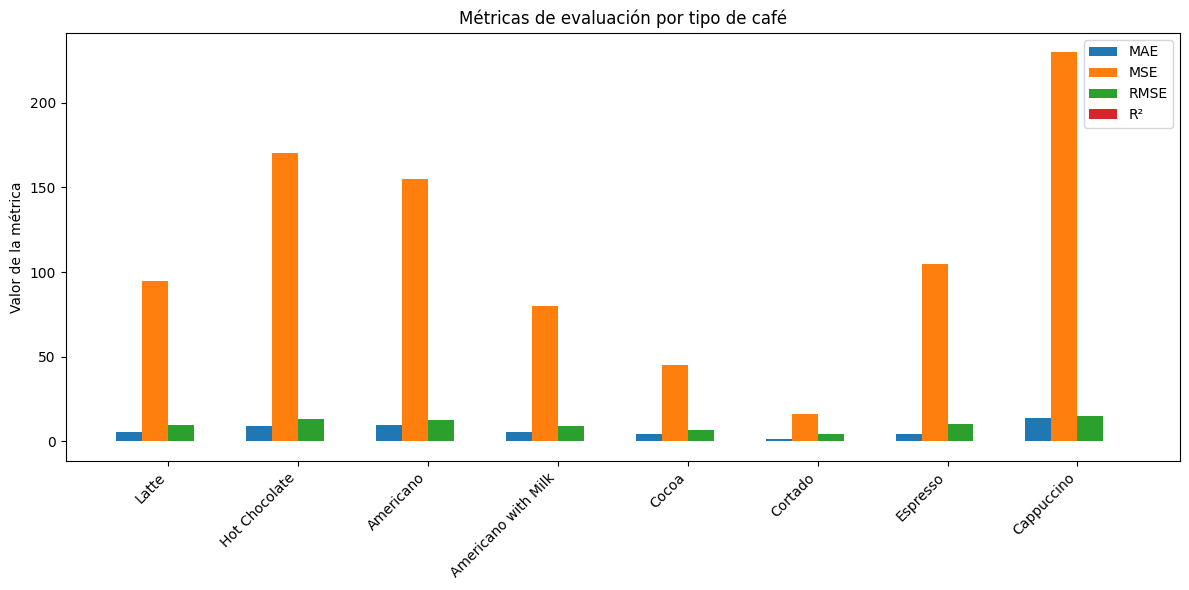

In [22]:
###  Evaluación del Modelo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicciones
y_pred = model_multi.predict(X_train)

# Nombres de los tipos de café (de df)
nombres_coffee = df['coffee_name'].unique()

# Listas para almacenar métricas
maes = []
mses = []
rmses = []
r2s = []

for i in range(y_train_multi.shape[1]):
    mae = mean_absolute_error(y_train_multi[:, i], y_pred[:, i])
    mse = mean_squared_error(y_train_multi[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train_multi[:, i], y_pred[:, i])
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)

# Gráfico de barras para las métricas
x = np.arange(len(nombres_coffee))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width*1.5, maes, width, label='MAE')
ax.bar(x - width/2, mses, width, label='MSE')
ax.bar(x + width/2, rmses, width, label='RMSE')
ax.bar(x + width*1.5, r2s, width, label='R²')

ax.set_ylabel('Valor de la métrica')
ax.set_title('Métricas de evaluación por tipo de café')
ax.set_xticks(x)
ax.set_xticklabels(nombres_coffee, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


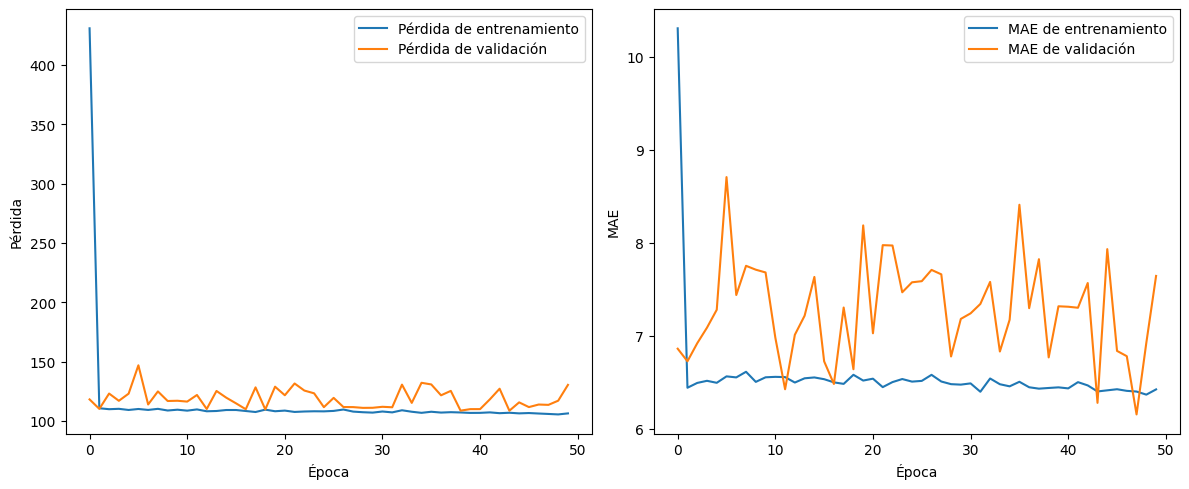

In [23]:
### Visualización adicional: Curvas de pérdida y métricas durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Suma el monto vendido por cada tipo de café
ventas_por_cafe = pivot_money.sum()
cafe_mas_vendido = ventas_por_cafe.idxmax()
monto_mas_vendido = ventas_por_cafe.max()

print(f"El café más vendido es: {cafe_mas_vendido}")
print(f"Con un monto total de: {monto_mas_vendido:.2f}")
# Agrupa por día de la semana y suma el monto total vendido
ventas_por_dia = df.groupby('day_of_week')['money'].sum()
dia_mas_vendido = ventas_por_dia.idxmax()
monto_dia_mas_vendido = ventas_por_dia.max()

dias = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
print("Un día de la semana es:", dias[1])  # Imprime: Un día de la semana es: martes


print(f"El día que más se vende es: {dia_mas_vendido}")
print(f"Con un monto total de: {monto_dia_mas_vendido:.2f}")

El café más vendido es: Latte
Con un monto total de: 27866.30
Un día de la semana es: martes
El día que más se vende es: 1
Con un monto total de: 18637.38


3.- SERIALIZACION DEL MODELO

In [25]:
# Guardar en formato HDF5 (.h5)
model_multi.save('modelo_cafe.keras')
model_multi.save('modelo_cafe.h5')


In [27]:
# Supón que tienes un diccionario de preprocesadores
# (por ejemplo, uno para cada columna categórica)
import pickle

preprocesadores = {}

for col in features:
    if col in ['cash_type', 'card']:  # Ejemplo: solo columnas categóricas
        le = LabelEncoder()
        le.fit(df[col])
        preprocesadores[col] = le

# Guardar preprocesadores con pickle
with open('preprocesadores.pkl', 'wb') as f:
    pickle.dump(preprocesadores, f)

# Alternativa con joblib (para objetos grandes)
from joblib import dump
dump(preprocesadores, 'preprocesadores.joblib')

['preprocesadores.joblib']

In [28]:
# Guardar modelo de Keras
model_multi.save('modelo_cafe.h5')

# Guardar preprocesadores
import pickle

preprocesadores = {}
for col in features:
    if col in ['cash_type', 'card']:  # Ajusta según tus columnas categóricas
        le = LabelEncoder()
        le.fit(df[col])
        preprocesadores[col] = le

with open('preprocesadores.pkl', 'wb') as f:
    pickle.dump(preprocesadores, f)

In [29]:
from tensorflow import keras
from tensorflow.keras.losses import MeanSquaredError
import pickle

# 1. Cargar el modelo
# Si guardaste el modelo como '.h5', usa esto:
modelo_cargado = keras.models.load_model(
    'modelo_cafe.h5',
    custom_objects={'mse': MeanSquaredError()}
)

# Si guardaste el modelo como '.keras', normalmente no necesitas custom_objects,
# pero puedes usarlo igual por seguridad:
# modelo_cargado = keras.models.load_model('modelo_cafe.keras')

# 2. Cargar los preprocesadores
with open('preprocesadores.pkl', 'rb') as f:
    preprocesadores_cargados = pickle.load(f)

# 3. (Opcional) Verificar que todo se cargó correctamente
print("Modelo cargado:", type(modelo_cargado))
print("Preprocesadores cargados:", preprocesadores_cargados)

Modelo cargado: <class 'keras.src.models.sequential.Sequential'>
Preprocesadores cargados: {'cash_type': LabelEncoder(), 'card': LabelEncoder()}
